In [19]:
import tensorflow as tf
import tensorflow_addons as tfa
import numpy as np
import matplotlib.pyplot as plt

def MinMaxScaler(data):
    numerator = data - np.min(data, 0)
    denominator = np.max(data, 0) - np.min(data, 0)
    # noise term prevents the zero division
    return numerator / (denominator + 1e-7)

In [7]:
seq_length = 7
timesteps = seq_length
data_dim = 5
output_dim = 1

xy = np.loadtxt('data-02-stock_daily.csv', delimiter=',')
xy = xy[::-1]
xy = MinMaxScaler(xy)
x = xy
y = xy[:, [-1]]

dataX = []
dataY = []

for i in range(0, len(y) - seq_length):
    _x = x[i:i + seq_length]
    _y = y[i + seq_length]
    #print(_x, "->", _y)
    dataX.append(_x)
    dataY.append(_y)
    
train_size = int(len(dataY) * 0.7)
test_size = len(dataY) - train_size
trainX, testX = np.array(dataX[0:train_size]), np.array(dataX[train_size:len(dataX)])
trainY, testY = np.array(dataY[0:train_size]), np.array(dataY[train_size:len(dataY)])


In [32]:
g1 = tf.Graph()
with g1.as_default() as graph:
    
    #dic_size = len(char2idx)
    #rnn_hidden_size = len(char2idx)
    #num_classes = len(char2idx)
    #batch_size = 1
    #sequence_length = len(sample) - 1

    hidden_dim = 5
    sequence_length = seq_length
    
    X = tf.compat.v1.placeholder(tf.float32, [None, sequence_length, data_dim])
    Y = tf.compat.v1.placeholder(tf.float32, [None, 1])
    
    cell = tf.compat.v1.nn.rnn_cell.LSTMCell(num_units=hidden_dim, state_is_tuple=True)
    
    outputs, _states = tf.compat.v1.nn.dynamic_rnn(cell, X, dtype=tf.float32)    
    Y_pred = tf.compat.v1.layers.dense(outputs[:,-1], output_dim)
    
    loss = tf.reduce_sum(tf.square(Y_pred - Y))
    train = tf.compat.v1.train.AdamOptimizer(learning_rate=0.01).minimize(loss)    
    
    prediction = tf.argmax(outputs, axis=2)
    
    init_op = tf.compat.v1.global_variables_initializer()
    
sess = tf.compat.v1.Session(graph = g1)
sess.run(init_op)

0 0.37399057
100 0.37236854
200 0.3711858
300 0.36973906
400 0.3684029
500 0.367733
600 0.36622107
700 0.36498445
800 0.36433056
900 0.36275336


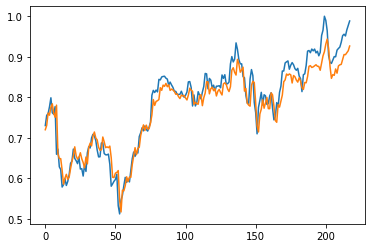

In [35]:
for i in range(1000):
    l, _ = sess.run([loss, train], feed_dict={X: trainX, Y: trainY})
    
    if i % 100 == 0:    
        print(i, l)
testPredict = sess.run(Y_pred, feed_dict={X: testX})

plt.plot(testY)
plt.plot(testPredict)
plt.show()